In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [66]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Questions to Answer
* Can Name be split up into first and last name? (Could last name be a contributing factor to success )
* Can the cabin be seprated into different variables? What do the cabin pieces mean? is there some correlation which cabin positioning & survival rate?
* Any contributing factor to major sucess transportation? ( either categorical or not?)
* Are there any categorical variables worth upsampling or downsampling while constructing the model?
* What models might work best at first for this model?


In [59]:
df = pd.read_csv("train.csv")

In [60]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [61]:
df.corr()

C:\Users\Charl\AppData\Local\Temp\ipykernel_39960\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


HomePlanet 4
True     1404
False     727
Name: Transported, dtype: int64
False    2651
True     1951
Name: Transported, dtype: int64
True     920
False    839
Name: Transported, dtype: int64
Series([], Name: Transported, dtype: int64)


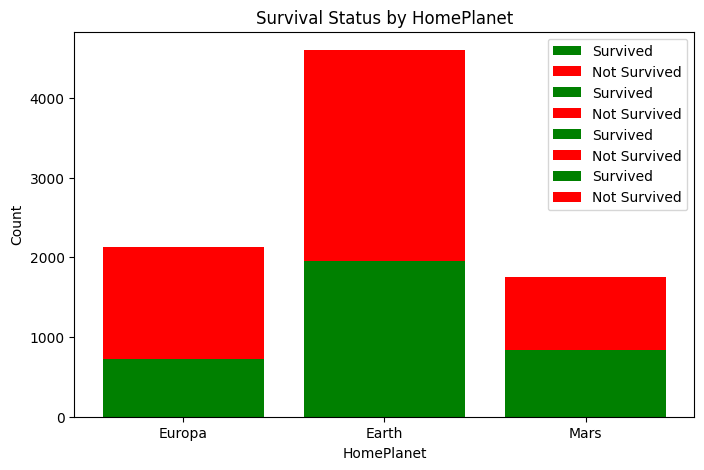

CryoSleep 3
False    3650
True     1789
Name: Transported, dtype: int64
True     2483
False     554
Name: Transported, dtype: int64
Series([], Name: Transported, dtype: int64)


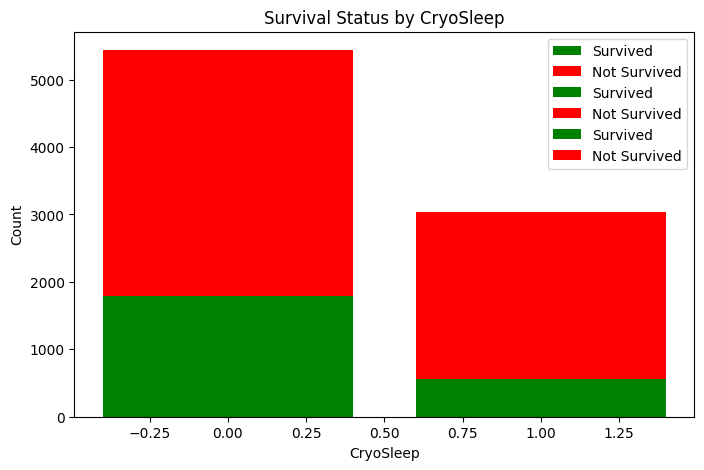

Cabin 6561
Destination 4
False    3128
True     2787
Name: Transported, dtype: int64
True     401
False    395
Name: Transported, dtype: int64
True     1098
False     702
Name: Transported, dtype: int64
Series([], Name: Transported, dtype: int64)


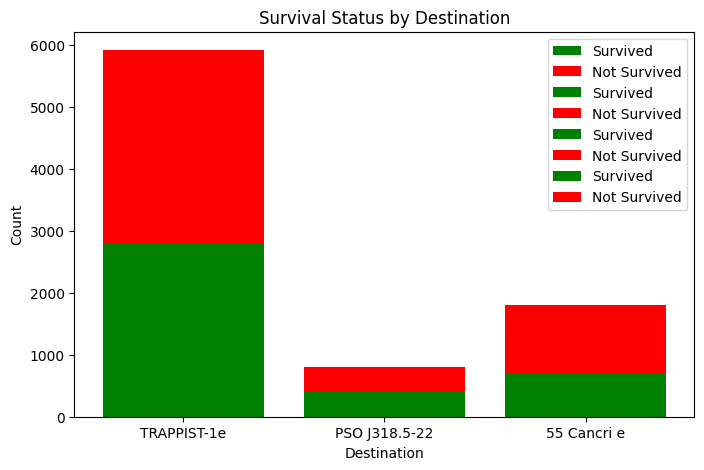

VIP 3
True     4198
False    4093
Name: Transported, dtype: int64
False    123
True      76
Name: Transported, dtype: int64
Series([], Name: Transported, dtype: int64)


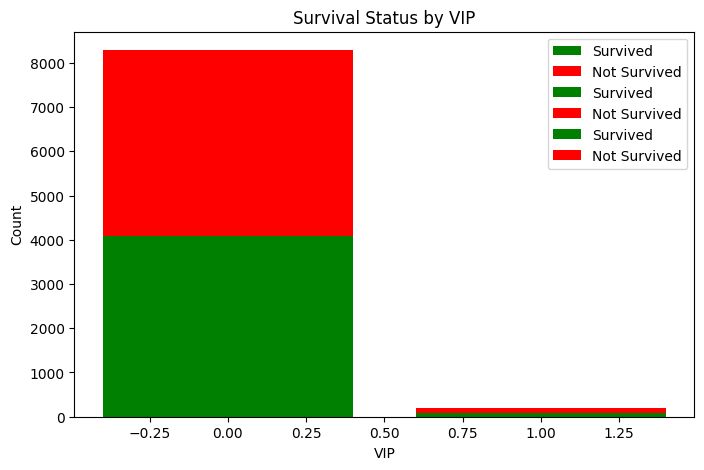

Name 8474


In [65]:
# If the column is an object type, create a categorical version.
categorical_columns = [col for col in df.select_dtypes(include='object').columns if col != 'PassengerId']

# Set colors for survived (1) and not survived (0)
colors = {1: 'green', 0: 'red'}

# Iterate through each categorical column and create a bar chart

for column in categorical_columns:
    unique_values = df[column].unique()
    print(column, len(unique_values))

    if len(unique_values) > 10:
        continue
    
    plt.figure(figsize=(8, 5))
    
    for value in unique_values:
        subset = df[(df[column] == value)]
        survived_counts = subset['Transported'].value_counts()
        print(survived_counts)
        
        plt.bar([value], [survived_counts.get(1, 0)], color=colors.get(1, 'gray'), label='Survived')
        plt.bar([value], [survived_counts.get(0, 0)], bottom=survived_counts.get(1, 0), color=colors.get(0, 'gray'), label='Not Survived')

    # Customize the plot for each column
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plt.title(f'Survival Status by {column}')
    plt.show()